# Exploratory Data Analysis
* Author: Amal Varghese
* Github: codewizard-2004

* This notebook aims to conduct data analysis on the primary source of data
* For this project we are using Food101 Dataset provided [here](http://data.vision.ee.ethz.ch/cvl/food-101.tar.gz)

In [2]:
import sys
import os
sys.path.append(os.path.abspath(".."))  # Go up from notebooks to project root

In [3]:
from pathlib import Path

data_dir = Path("../data/food-101/images")

In [19]:
data_dir

WindowsPath('../data/food-101/images')

# Total Number of Images

In [24]:
total = len(list(data_dir.rglob("*")))
print(f"Total Images: {total}")

Total Images: 101101


# Getting the name of all Classes/ Food items

In [38]:
classes = [f.name for f in data_dir.iterdir() if f.is_dir()]
print(classes)
print(f"\n\nNumber of classes: {len(classes)}")

['apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio', 'beef_tartare', 'beet_salad', 'beignets', 'bibimbap', 'bread_pudding', 'breakfast_burrito', 'bruschetta', 'caesar_salad', 'cannoli', 'caprese_salad', 'carrot_cake', 'ceviche', 'cheesecake', 'cheese_plate', 'chicken_curry', 'chicken_quesadilla', 'chicken_wings', 'chocolate_cake', 'chocolate_mousse', 'churros', 'clam_chowder', 'club_sandwich', 'crab_cakes', 'creme_brulee', 'croque_madame', 'cup_cakes', 'deviled_eggs', 'donuts', 'dumplings', 'edamame', 'eggs_benedict', 'escargots', 'falafel', 'filet_mignon', 'fish_and_chips', 'foie_gras', 'french_fries', 'french_onion_soup', 'french_toast', 'fried_calamari', 'fried_rice', 'frozen_yogurt', 'garlic_bread', 'gnocchi', 'greek_salad', 'grilled_cheese_sandwich', 'grilled_salmon', 'guacamole', 'gyoza', 'hamburger', 'hot_and_sour_soup', 'hot_dog', 'huevos_rancheros', 'hummus', 'ice_cream', 'lasagna', 'lobster_bisque', 'lobster_roll_sandwich', 'macaroni_and_cheese', 'macarons', 'miso_sou

# Finding the number of images under each class

In [30]:
image_number = len(list((data_dir/classes[0]).rglob("*")))
print(f"Number of Images in {classes[0]} is {image_number}")

Number of Images in apple_pie is 1000


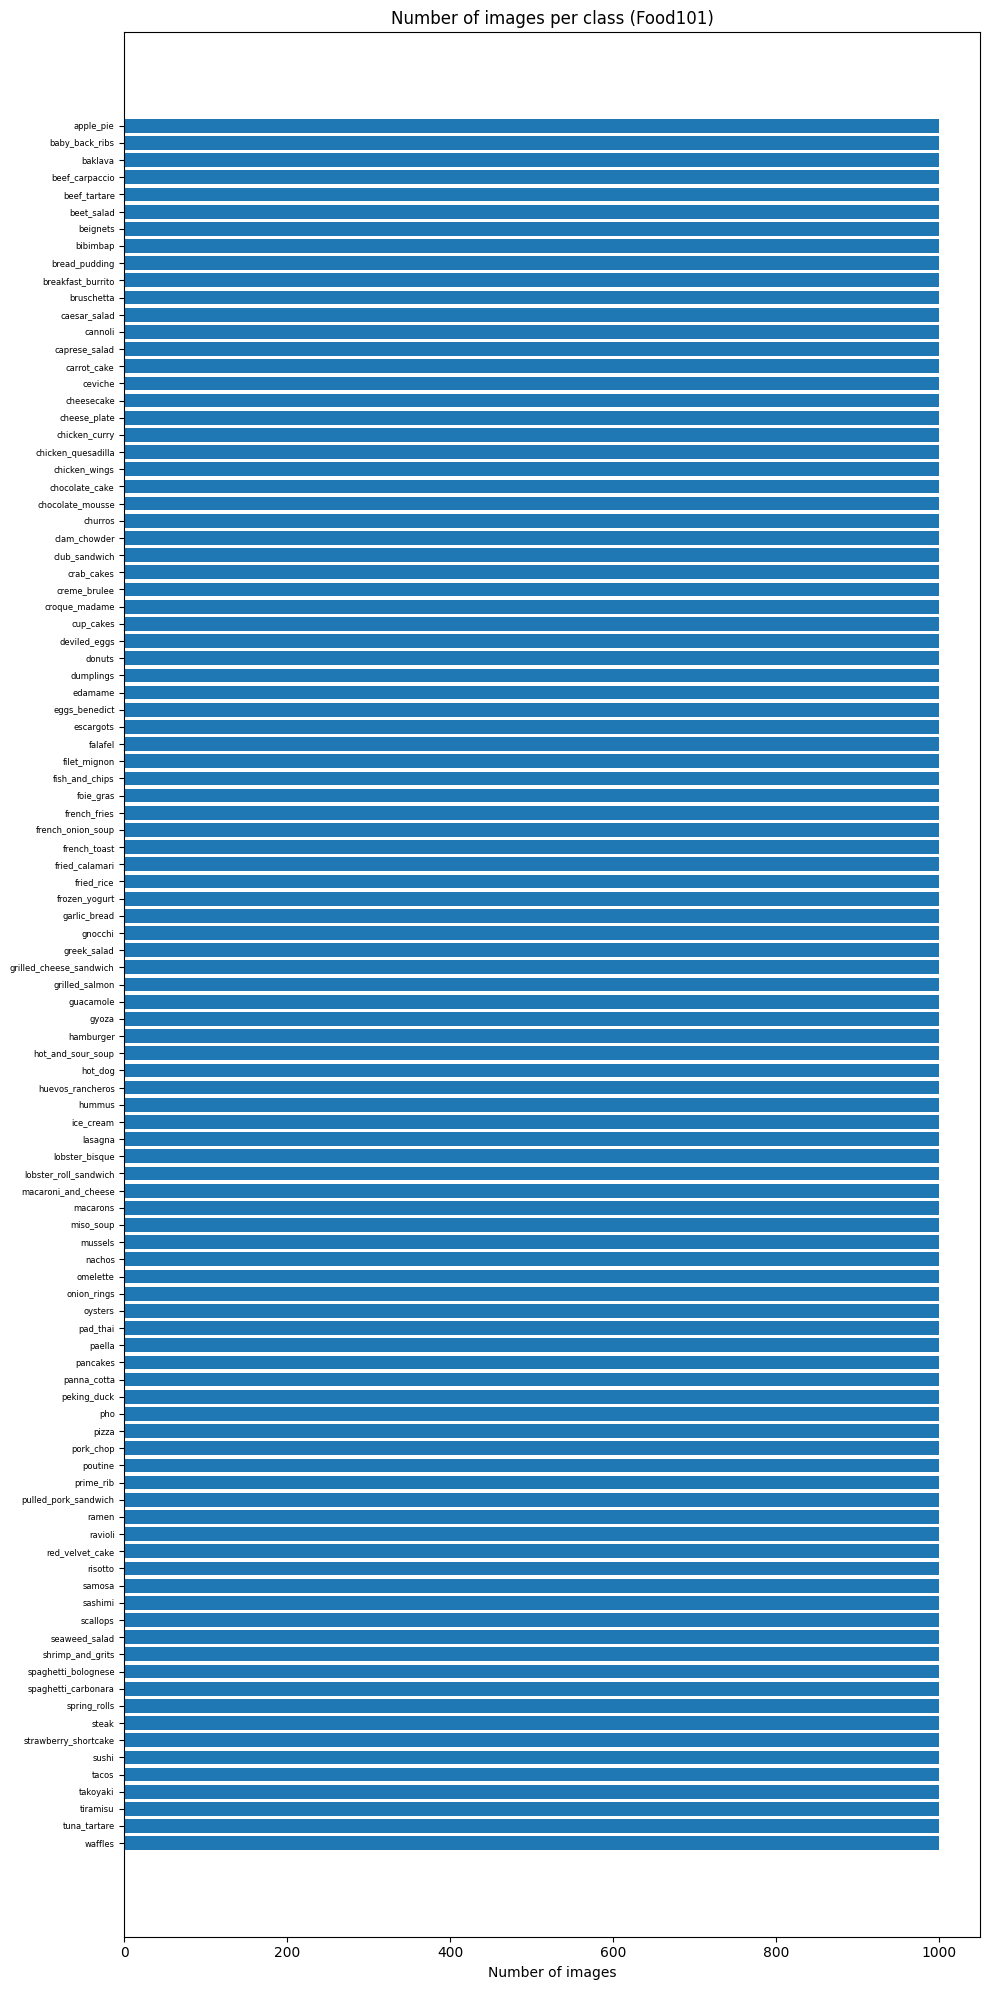

In [31]:
import matplotlib.pyplot as plt

# count images per class
counts = [sum(1 for f in (data_dir / cls).rglob("*") if f.is_file()) for cls in classes]

# plot horizontal bar chart (better for many class names)
fig, ax = plt.subplots(figsize=(10, 20))
y_pos = range(len(classes))
ax.barh(y_pos, counts, color="C0")
ax.set_yticks(y_pos)
ax.set_yticklabels(classes, fontsize=6)  # small font for many labels
ax.invert_yaxis()  # highest count at top
ax.set_xlabel("Number of images")
ax.set_title("Number of images per class (Food101)")
plt.tight_layout()
plt.show()

# Creating custom Dataset

- 40% of each class (400 images for one class)
- train dataset: 75% of selected (300 images)
- test dataset: 25% of selected (100 images)

* To use ImageFolder class in pytorch directory should be in this format

* customdata/
    * train/
        * pizza/
            * image1.png
            * image300.png
        * steak/
            * image1.png
            * image300.png
    * test/
        * pizza/
            * image1.png
            * image300.png
        * steak/
            * image1.png
            * image2.png

In [ ]:
from utils.data_setup import create_custom_dirs

new_path = Path("../data/custom_dataset")
create_custom_dirs(new_path)

created new directory: ..\data\custom_dataset\test

created new directory: ..\data\custom_dataset\train


(WindowsPath('../data/custom_dataset/train'),
 WindowsPath('../data/custom_dataset/test'))

In [4]:
from utils.data_setup import create_custom_dirs

pizza_steak_sushi = Path("../data/pizza_steak_sushi")
create_custom_dirs(pizza_steak_sushi)

created new directory: ..\data\pizza_steak_sushi\test

created new directory: ..\data\pizza_steak_sushi\train


(WindowsPath('../data/pizza_steak_sushi/train'),
 WindowsPath('../data/pizza_steak_sushi/test'))

In [40]:
from utils.data_setup import create_custom_data

create_custom_data(
    data_loc=data_dir,
    train_loc=Path(new_path/"train"),
    test_loc=Path(new_path/"test"),
    classes=["apple_pie","pizza","steak","sushi","chicken_curry", "chocolate_cake"],
    size=40,
    train_test_split=80)

train images for apple_pie: 320
test images for apple_pie: 80



    Train [apple_pie]: 100%|██████████| 320/320 [00:03<00:00, 89.81img/s]


Completed creating ..\data\custom_dataset\train\apple_pie



    Test [apple_pie]: 100%|██████████| 80/80 [00:00<00:00, 87.16img/s]


Completed creating custom ..\data\custom_dataset\test\apple_pie
train images for pizza: 320
test images for pizza: 80



    Train [pizza]: 100%|██████████| 320/320 [00:03<00:00, 92.32img/s]


Completed creating ..\data\custom_dataset\train\pizza



    Test [pizza]: 100%|██████████| 80/80 [00:01<00:00, 75.24img/s]


Completed creating custom ..\data\custom_dataset\test\pizza
train images for steak: 320
test images for steak: 80



    Train [steak]: 100%|██████████| 320/320 [00:03<00:00, 85.85img/s]


Completed creating ..\data\custom_dataset\train\steak



    Test [steak]: 100%|██████████| 80/80 [00:00<00:00, 92.64img/s]


Completed creating custom ..\data\custom_dataset\test\steak
train images for sushi: 320
test images for sushi: 80



    Train [sushi]: 100%|██████████| 320/320 [00:03<00:00, 91.18img/s]


Completed creating ..\data\custom_dataset\train\sushi



    Test [sushi]: 100%|██████████| 80/80 [00:00<00:00, 90.97img/s]


Completed creating custom ..\data\custom_dataset\test\sushi
train images for chicken_curry: 320
test images for chicken_curry: 80



    Train [chicken_curry]: 100%|██████████| 320/320 [00:03<00:00, 89.15img/s]


Completed creating ..\data\custom_dataset\train\chicken_curry



    Test [chicken_curry]: 100%|██████████| 80/80 [00:00<00:00, 89.20img/s]


Completed creating custom ..\data\custom_dataset\test\chicken_curry
train images for chocolate_cake: 320
test images for chocolate_cake: 80



    Train [chocolate_cake]: 100%|██████████| 320/320 [00:03<00:00, 86.67img/s]


Completed creating ..\data\custom_dataset\train\chocolate_cake



    Test [chocolate_cake]: 100%|██████████| 80/80 [00:00<00:00, 87.87img/s]

Completed creating custom ..\data\custom_dataset\test\chocolate_cake


In [6]:
from utils.data_setup import create_custom_data

create_custom_data(
    data_loc=data_dir,
    train_loc=Path(pizza_steak_sushi/"train"),
    test_loc=Path(pizza_steak_sushi/"test"),
    classes=["pizza","steak","sushi"],
    size=40,
    train_test_split=80)

train images for pizza: 320
test images for pizza: 80



    Train [pizza]:   0%|          | 0/320 [00:00<?, ?img/s]

    Train [pizza]: 100%|██████████| 320/320 [00:03<00:00, 104.01img/s]


Completed creating ..\data\pizza_steak_sushi\train\pizza



    Test [pizza]: 100%|██████████| 80/80 [00:00<00:00, 112.04img/s]


Completed creating custom ..\data\pizza_steak_sushi\test\pizza
train images for steak: 320
test images for steak: 80



    Train [steak]: 100%|██████████| 320/320 [00:02<00:00, 107.29img/s]


Completed creating ..\data\pizza_steak_sushi\train\steak



    Test [steak]: 100%|██████████| 80/80 [00:00<00:00, 105.63img/s]


Completed creating custom ..\data\pizza_steak_sushi\test\steak
train images for sushi: 320
test images for sushi: 80



    Train [sushi]: 100%|██████████| 320/320 [00:03<00:00, 98.14img/s] 


Completed creating ..\data\pizza_steak_sushi\train\sushi



    Test [sushi]: 100%|██████████| 80/80 [00:00<00:00, 104.83img/s]

Completed creating custom ..\data\pizza_steak_sushi\test\sushi


In [4]:
from utils.data_setup import create_custom_dirs

pizza_steak_sushi60 = Path("../data/pizza_steak_sushi60")
create_custom_dirs(pizza_steak_sushi60)

created new directory: ..\data\pizza_steak_sushi60\test

created new directory: ..\data\pizza_steak_sushi60\train


(WindowsPath('../data/pizza_steak_sushi60/train'),
 WindowsPath('../data/pizza_steak_sushi60/test'))

In [5]:
from utils.data_setup import create_custom_data

create_custom_data(
    data_loc=data_dir,
    train_loc=Path(pizza_steak_sushi60/"train"),
    test_loc=Path(pizza_steak_sushi60/"test"),
    classes=["pizza","steak","sushi"],
    size=60,
    train_test_split=80)

train images for pizza: 480
test images for pizza: 120



    Train [pizza]: 100%|██████████| 480/480 [00:05<00:00, 91.67img/s]


Completed creating ..\data\pizza_steak_sushi60\train\pizza



    Test [pizza]: 100%|██████████| 120/120 [00:01<00:00, 84.78img/s]


Completed creating custom ..\data\pizza_steak_sushi60\test\pizza
train images for steak: 480
test images for steak: 120



    Train [steak]: 100%|██████████| 480/480 [00:05<00:00, 84.97img/s]


Completed creating ..\data\pizza_steak_sushi60\train\steak



    Test [steak]: 100%|██████████| 120/120 [00:01<00:00, 81.99img/s]


Completed creating custom ..\data\pizza_steak_sushi60\test\steak
train images for sushi: 480
test images for sushi: 120



    Train [sushi]: 100%|██████████| 480/480 [00:05<00:00, 82.15img/s]


Completed creating ..\data\pizza_steak_sushi60\train\sushi



    Test [sushi]: 100%|██████████| 120/120 [00:01<00:00, 86.43img/s]

Completed creating custom ..\data\pizza_steak_sushi60\test\sushi


In [6]:
from pathlib import Path
import shutil

def zip_directory(dir_path: Path, output_zip: str):
    output_zip_path = Path(output_zip)
    shutil.make_archive(
        base_name=str(output_zip_path.with_suffix('')),
        format='zip',
        root_dir=dir_path
    )

zip_directory(pizza_steak_sushi60, "pizza_steak_sushi60.zip")


# Conclusion

* Total Number of Images in the data: 101101
* Total Number of Classes in the data: 101
* Total Number of Images in each class: 1000

* Custom Dataset Details:
    - Total classes: 6
    - Total images: 2400
    - Train images per class: 320
    - Test images per class: 80